In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read datasets
df_hos_2016 = pd.read_excel('/Users/cathycai/Desktop/Career/Project Experience/Healthcare/Hospitalization 2016.xlsx')
df_hos_2021 = pd.read_excel('/Users/cathycai/Desktop/Career/Project Experience/Healthcare/Hospitalization 2021.xlsx')
df_marg_2016 = pd.read_excel('/Users/cathycai/Desktop/Career/Project Experience/Healthcare/On-Marg 2016.xlsx')
df_marg_2021 =pd.read_excel('/Users/cathycai/Desktop/Career/Project Experience/Healthcare/On-Marg 2021.xlsx')

In [4]:
#Merge datasets by year
df_2016 = pd.merge(df_hos_2016, df_marg_2016, on = 'Geography', how = 'inner')
df_2021 = pd.merge(df_hos_2021, df_marg_2021, on = 'Geography', how = 'inner')

In [5]:
#combine two merged datasets to be one 
df_combined = pd.concat([df_2016, df_2021], ignore_index= True)
print(df_combined.shape)
print(df_combined.columns)

(68, 15)
Index(['Indicator', 'Measure', 'Year', 'Geography', 'Rate',
       '95% Confidence Interval', 'Count', 'Population',
       'Significance Compared to Ontario', 'PHUUID', 'pop',
       'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID',
       'ethniccon_PHUUID'],
      dtype='object')


In [6]:
#check missing value, no missing value
print(df_combined.isnull().sum())

Indicator                           0
Measure                             0
Year                                0
Geography                           0
Rate                                0
95% Confidence Interval             0
Count                               0
Population                          0
Significance Compared to Ontario    0
PHUUID                              0
pop                                 0
instability_PHUUID                  0
deprivation_PHUUID                  0
dependency_PHUUID                   0
ethniccon_PHUUID                    0
dtype: int64


### EDA for 2016

In [7]:
#Display descriptive statistics
print(df_2016.describe())

         Year        Rate        Count    Population       PHUUID  \
count    34.0   34.000000    34.000000  3.400000e+01    34.000000   
mean   2016.0  129.317647   426.735294  4.080998e+05  3549.441176   
std       0.0   48.211111   450.167262  5.342834e+05    14.785724   
min    2016.0   56.800000    63.000000  3.385900e+04  3526.000000   
25%    2016.0  106.125000   214.750000  1.319485e+05  3538.250000   
50%    2016.0  120.450000   291.000000  1.911075e+05  3548.000000   
75%    2016.0  146.600000   566.250000  5.320370e+05  3559.500000   
max    2016.0  323.200000  2615.000000  2.819398e+06  3595.000000   

                pop  instability_PHUUID  deprivation_PHUUID  \
count  3.400000e+01           34.000000           34.000000   
mean   3.896663e+05           -0.046254            0.012186   
std    5.203905e+05            0.244315            0.264654   
min    3.320600e+04           -0.555853           -0.722989   
25%    1.157905e+05           -0.168388           -0.118593   


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


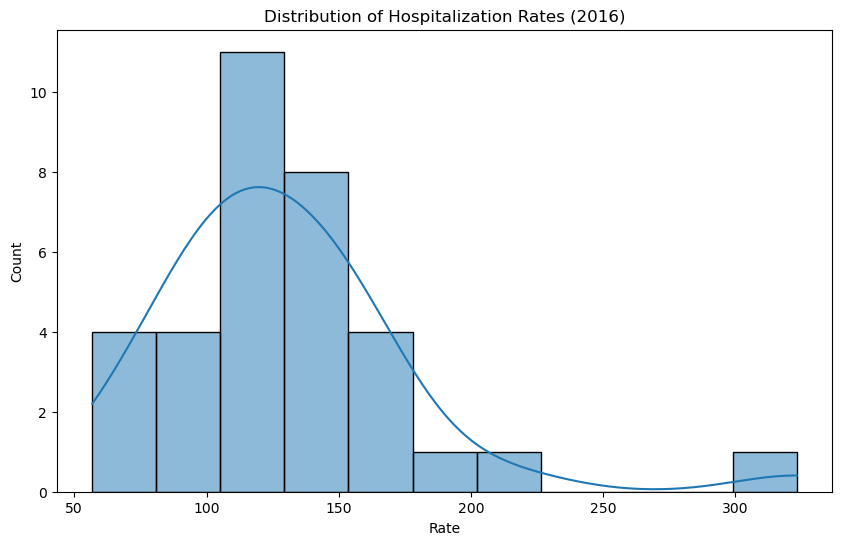

In [8]:
#Distribution of hospitalization rate
plt.figure(figsize=(10, 6))
sns.histplot(df_2016['Rate'], kde=True)
plt.title('Distribution of Hospitalization Rates (2016)')
plt.xlabel('Rate')
plt.show()

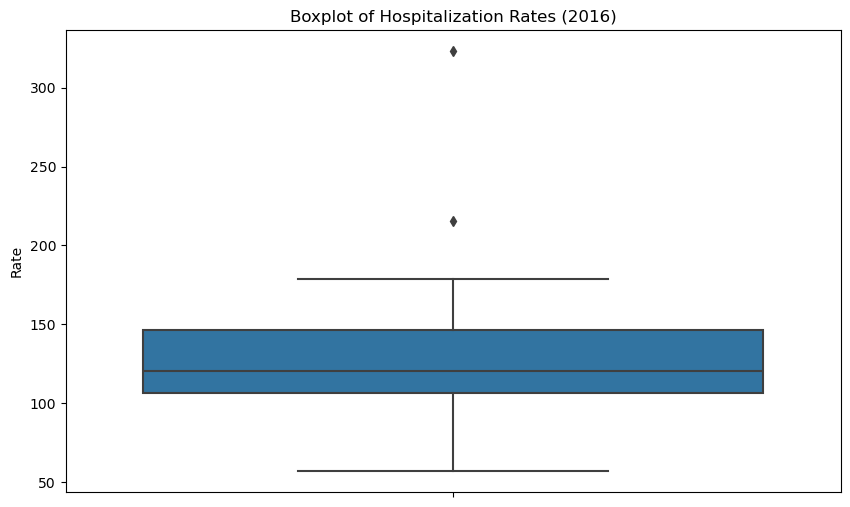

In [9]:
#Boxplot of hospitalization rates
plt.figure(figsize=(10, 6))
sns.boxplot(y='Rate', data=df_2016)
plt.title('Boxplot of Hospitalization Rates (2016)')
plt.show()

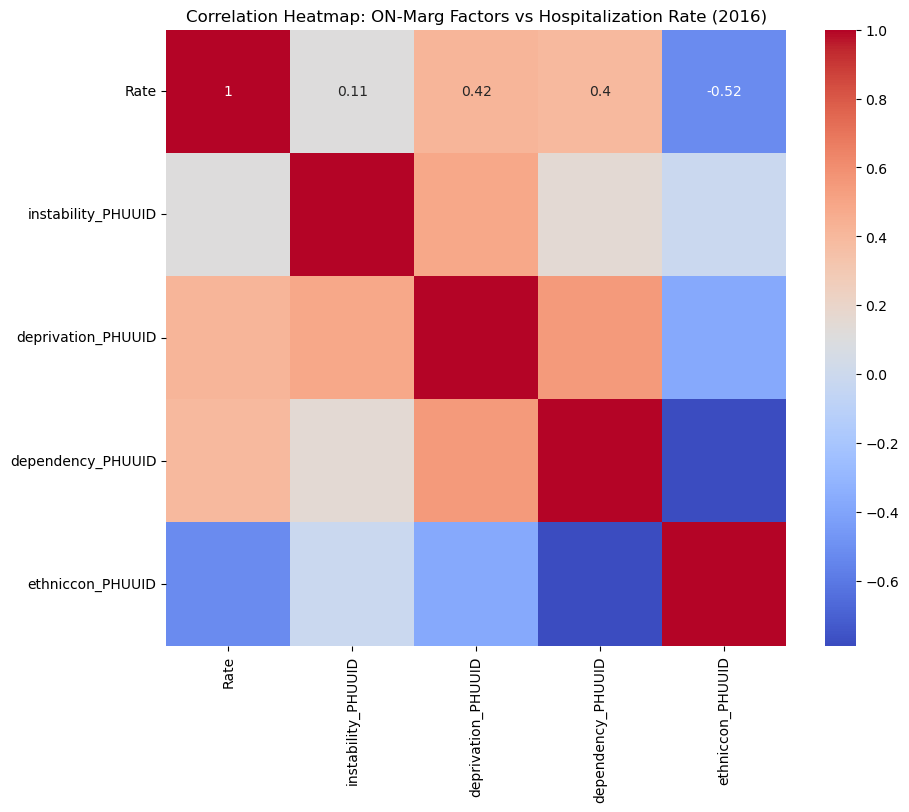

In [10]:
#Correlation heatmap for ON-Marg factors and Rate:
corr_cols = ['Rate', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']
plt.figure(figsize=(10, 8))
sns.heatmap(df_2016[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: ON-Marg Factors vs Hospitalization Rate (2016)')
plt.show()

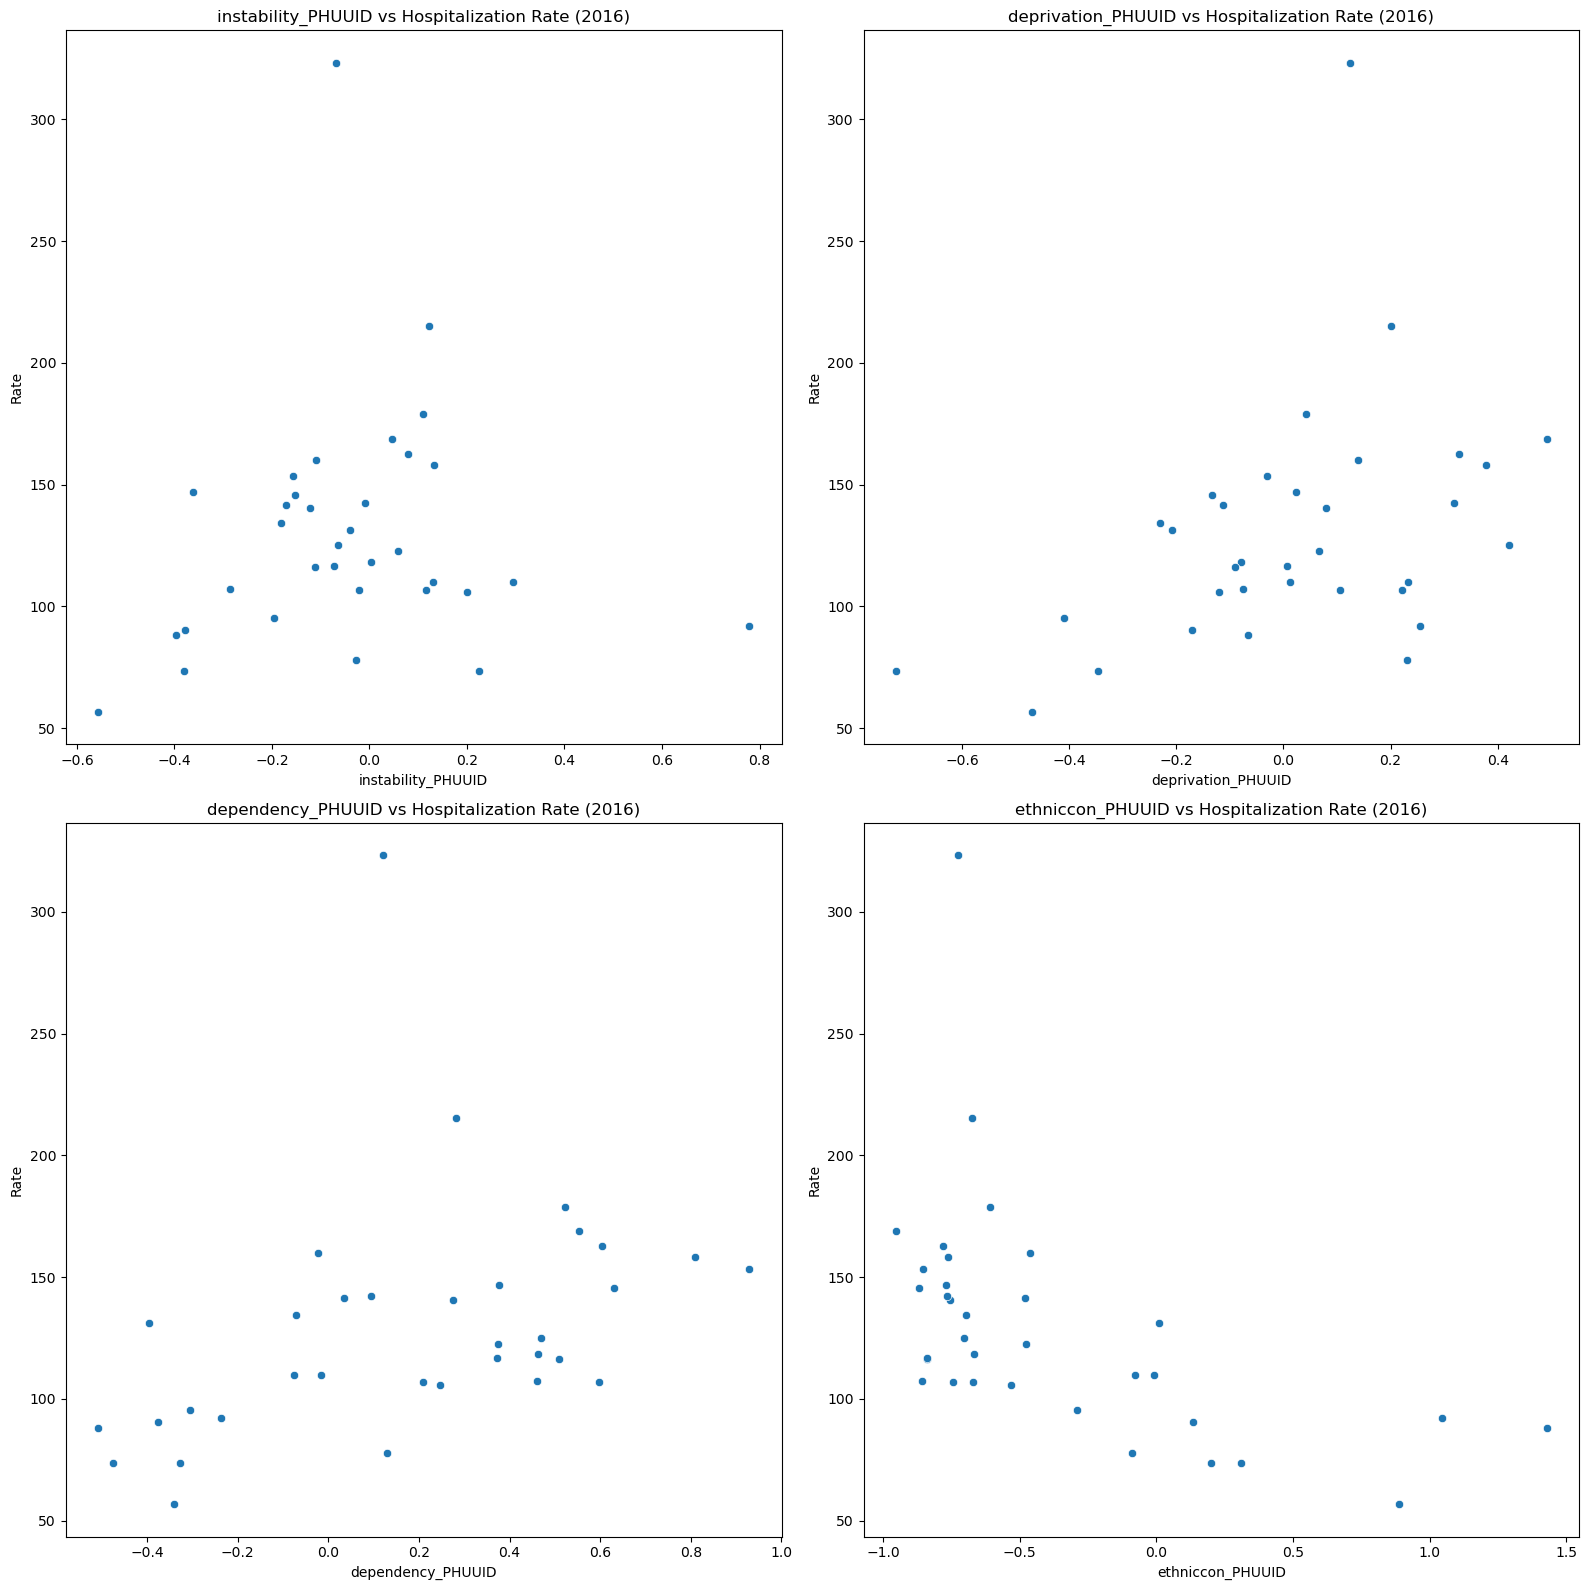

In [11]:
#Scatter plots for each ON-Marg factor vs. Rate
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

for i, factor in enumerate(['instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']):
    sns.scatterplot(x=factor, y='Rate', data=df_2016, ax=axes[i])
    axes[i].set_title(f'{factor} vs Hospitalization Rate (2016)')

plt.tight_layout()
plt.show()

### EDA for 2021

In [12]:
#Display descriptive statistics
print(df_2021.describe())

         Year        Rate        Count    Population       PHUUID  \
count    34.0   34.000000    34.000000  3.400000e+01    34.000000   
mean   2021.0  137.061765   470.852941  4.355664e+05  2461.294118   
std       0.0   59.353017   477.196874  5.672316e+05   715.355581   
min    2021.0   58.000000    88.000000  3.424800e+04  2226.000000   
25%    2021.0  102.325000   244.500000  1.365090e+05  2238.500000   
50%    2021.0  124.300000   306.500000  1.996805e+05  2250.000000   
75%    2021.0  143.325000   603.750000  5.695588e+05  2261.750000   
max    2021.0  347.000000  2753.000000  2.955862e+06  5183.000000   

                pop  instability_PHUUID  deprivation_PHUUID  \
count  3.400000e+01           34.000000           34.000000   
mean   4.183512e+05            0.013833            0.011166   
std    5.356753e+05            0.255414            0.249025   
min    3.253000e+04           -0.549149           -0.670790   
25%    1.327542e+05           -0.118604           -0.122411   


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


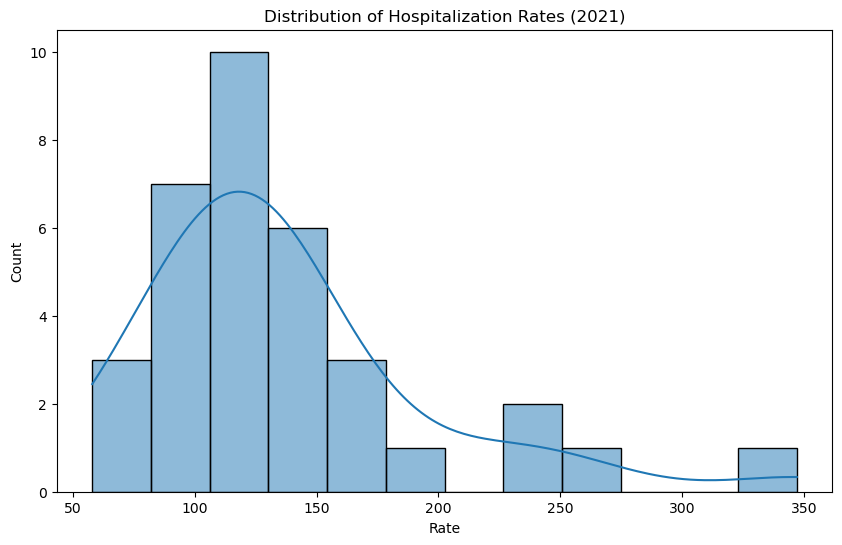

In [13]:
#Distribution of hospitalization rate
plt.figure(figsize=(10, 6))
sns.histplot(df_2021['Rate'], kde=True)
plt.title('Distribution of Hospitalization Rates (2021)')
plt.xlabel('Rate')
plt.show()

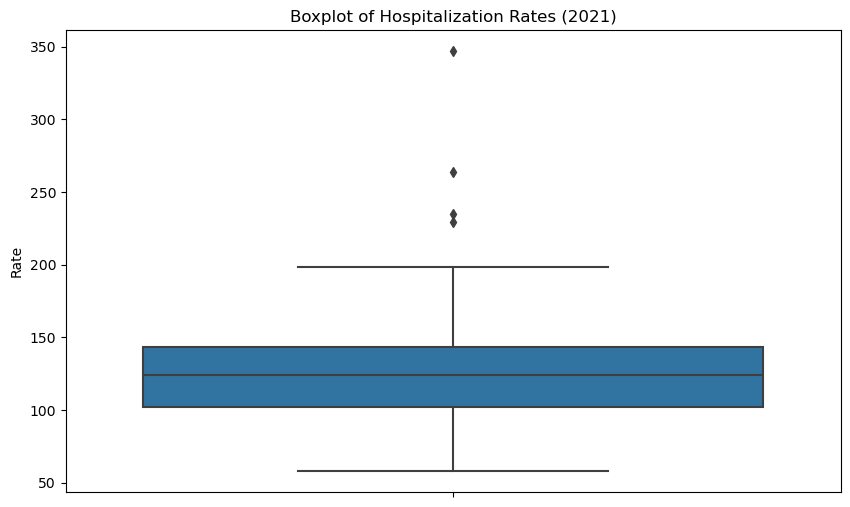

In [14]:
#Boxplot of hospitalization rates
plt.figure(figsize=(10, 6))
sns.boxplot(y='Rate', data=df_2021)
plt.title('Boxplot of Hospitalization Rates (2021)')
plt.show()

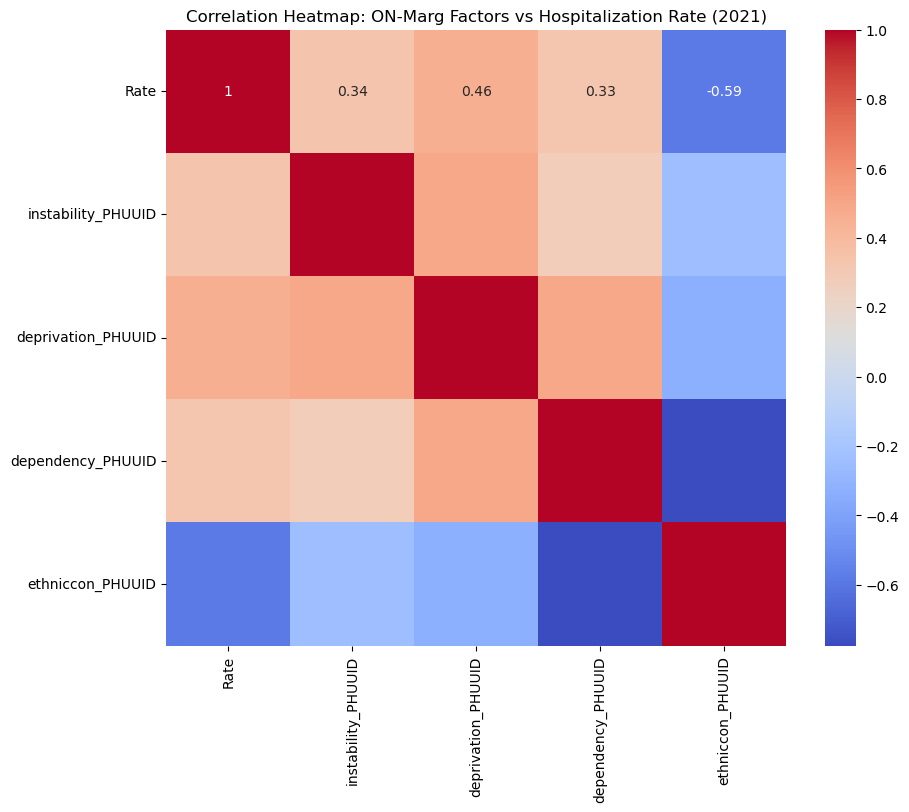

In [15]:
#Correlation heatmap for ON-Marg factors and Rate:
corr_cols = ['Rate', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']
plt.figure(figsize=(10, 8))
sns.heatmap(df_2021[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: ON-Marg Factors vs Hospitalization Rate (2021)')
plt.show()

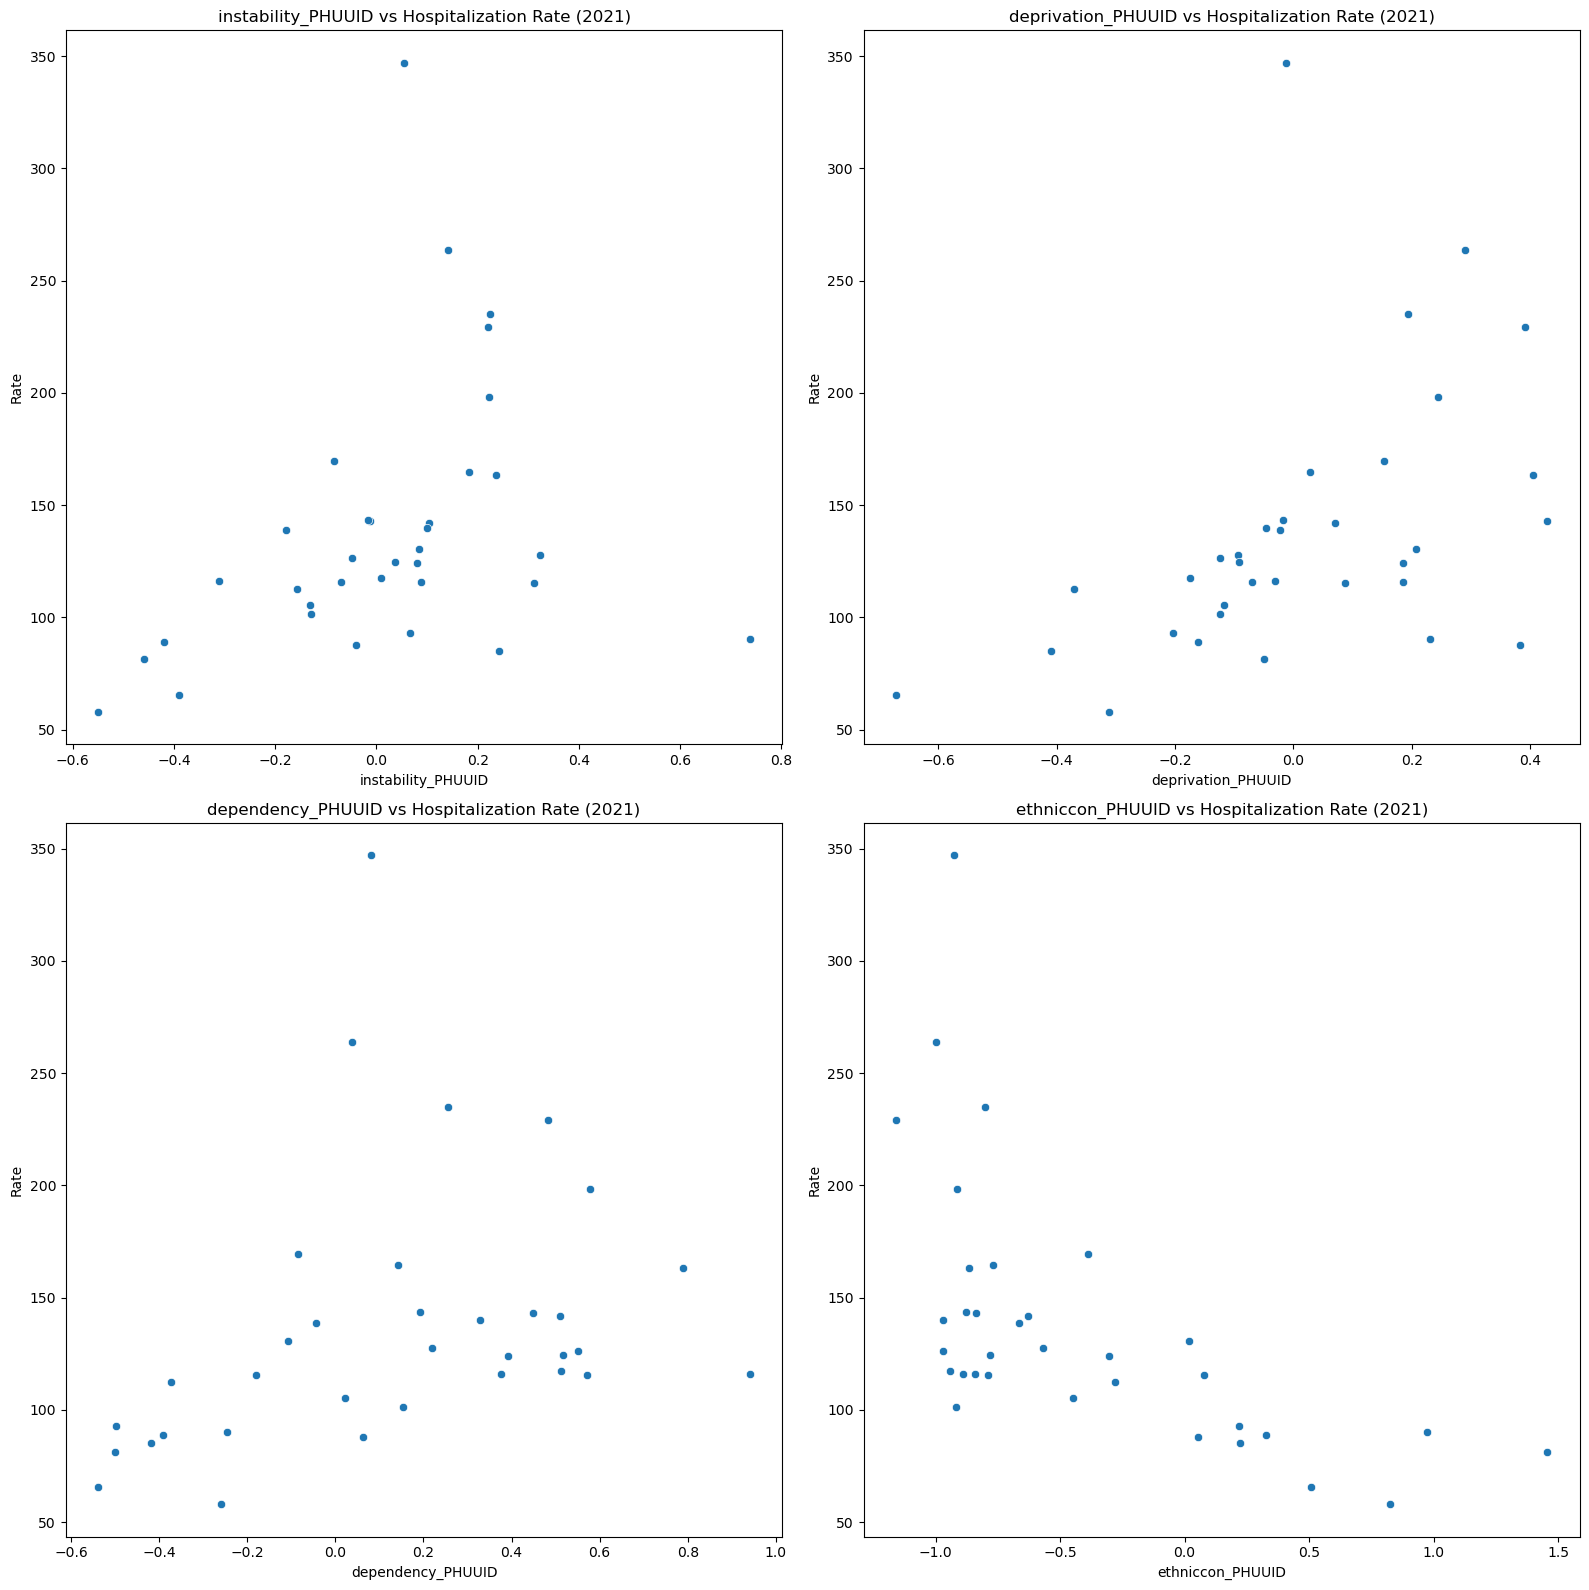

In [16]:
#Scatter plots for each ON-Marg factor vs. Rate
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

for i, factor in enumerate(['instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']):
    sns.scatterplot(x=factor, y='Rate', data=df_2021, ax=axes[i])
    axes[i].set_title(f'{factor} vs Hospitalization Rate (2021)')

plt.tight_layout()
plt.show()

### Hierarchical Multiple Regression

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# Create dummy variable for Year
df_combined['Year_Dummy'] = (df_combined['Year'] == 2021).astype(int)

In [19]:
# Define the dependent variable
y = df_combined['Rate']

In [20]:
# Define the models
models = [
    ('Base Model', ['Year_Dummy']),
    ('Model 2', ['Year_Dummy', 'instability_PHUUID']),
    ('Model 3', ['Year_Dummy', 'instability_PHUUID', 'deprivation_PHUUID']),
    ('Model 4', ['Year_Dummy', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID']),
    ('Full Model', ['Year_Dummy', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID'])
]

In [21]:
# Function to run regression and return summary
def run_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [22]:
# Run regressions and store results
results = []
for name, variables in models:
    X = df_combined[variables]
    model = run_regression(X, y)
    results.append((name, model))

In [23]:
# Print summaries and compare models
for i, (name, model) in enumerate(results):
    print(f"\n{name} Summary:")
    print(model.summary())
    
    if i > 0:
        prev_model = results[i-1][1]
        r_squared_change = model.rsquared - prev_model.rsquared
        print(f"\nR-squared change from previous model: {r_squared_change:.4f}")
        
        # Perform F-test for model comparison
        from statsmodels.stats.anova import anova_lm
        anova_results = anova_lm(prev_model, model)
        print("\nANOVA Results for Model Comparison:")
        print(anova_results)


Base Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.3487
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.557
Time:                        22:09:54   Log-Likelihood:                -366.81
No. Observations:                  68   AIC:                             737.6
Df Residuals:                      66   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.3176      9.27

In [24]:
# Compare BIC to select the best-fit model
print("\nBIC Summary:")
for name, model in results:
    print(f"{name}: {model.bic:.2f}")


BIC Summary:
Base Model: 742.06
Model 2: 742.27
Model 3: 736.11
Model 4: 738.34
Full Model: 718.80


All On-Marg factors have a meaningful impact on the diabetes hospitalization rate
Findings: 
    Simpson's Paradox: dependency has a positive correlation in the previous correlation heatmap but it has a negative coefficient in the model. This means dependency has multicollinearity to other risk factors. So I used a correlation matrix and VIF to find the correlation. 
    The correlation matrix shows dependency moderately correlates with deprivation which has a strong positive relationship with hospitalization rate.
    The VIF doesn't exceed 5 is good.
    
So, while dependency itself is positively correlated with the hospitalization rate, its negative relationship with ethnic concentration and other variables might be “adjusting” its effect in the regression model.

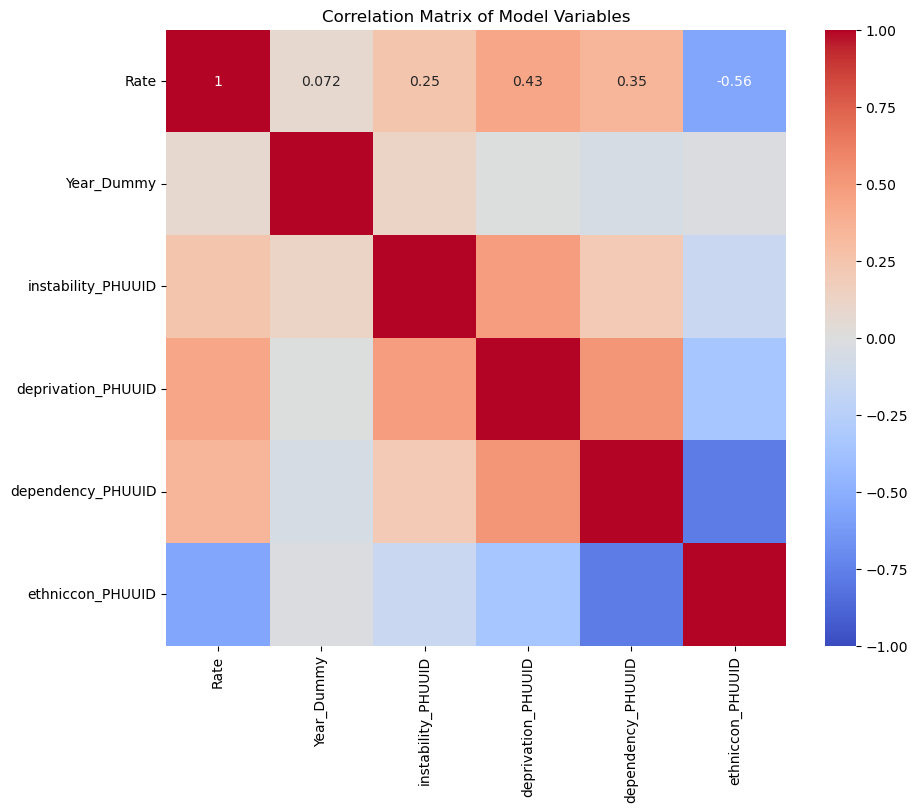

                        Rate  Year_Dummy  instability_PHUUID  \
Rate                1.000000    0.072498            0.245758   
Year_Dummy          0.072498    1.000000            0.121119   
instability_PHUUID  0.245758    0.121119            1.000000   
deprivation_PHUUID  0.434306   -0.002014            0.483430   
dependency_PHUUID   0.350502   -0.052627            0.206717   
ethniccon_PHUUID   -0.556721   -0.021128           -0.141236   

                    deprivation_PHUUID  dependency_PHUUID  ethniccon_PHUUID  
Rate                          0.434306           0.350502         -0.556721  
Year_Dummy                   -0.002014          -0.052627         -0.021128  
instability_PHUUID            0.483430           0.206717         -0.141236  
deprivation_PHUUID            1.000000           0.520095         -0.347491  
dependency_PHUUID             0.520095           1.000000         -0.777950  
ethniccon_PHUUID             -0.347491          -0.777950          1.000000  


In [25]:
# Correlation Matrix
# Select the variables you want to include in the correlation matrix
variables = ['Rate', 'Year_Dummy', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']

# Create the correlation matrix
corr_matrix = df_combined[variables].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Model Variables')
plt.show()

# Print the numerical values
print(corr_matrix)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe with your independent variables
X = df_combined[['Year_Dummy', 'instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']]

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
             Variable       VIF
0               const  2.466655
1          Year_Dummy  1.033264
2  instability_PHUUID  1.334498
3  deprivation_PHUUID  1.738116
4   dependency_PHUUID  3.134974
5    ethniccon_PHUUID  2.589348


Why ethniconn has a negative relationship with diabetes hospitalization rate? Is it because these people have a lower possibility of having diabetes due to their genetics or diets? OR Other reasons are because these people have difficulties accessing healthcare such as language difficulties, lack of health insurance, cultural differences in healthcare-seeking behavior, and systemic inequities. 

Find a correlation between prevalence and ON-Marg 
ethniconn has a positive relationship to diabetes prevalence, so a high ethniconn has a high possibility of diabetes. In the previous code, we find that ethnicoon has a negative relationship to diabetes hospitalization rate, which means minority ethnic and immigrants have low hospitalization rates potentially because they don't have access to hospitals instead they don't have diabetes.
So this correlation proves that these people can have diabetes. Therefore, the negative correlation between ethniconn and hospitalization is potentially due to them having difficulties accessing healthcare institutions.

Reference to support:

Lofters, A. K., Moineddin, R., Hwang, S. W., & Glazier, R. H. (2010). Low rates of
cervical cancer screening among urban immigrants: a population-based study in
Ontario, Canada. Med Care, 48, 611-618.

In [29]:
#read datasets
df_prev_2016 = pd.read_excel('/Users/cathycai/Desktop/Career/Project Experience/Healthcare/Diabetes Prevalence 2016.xlsx')

In [30]:
# Extract the prevalence rate from df_prev_2016
prevalence_rate = df_prev_2016['Rate']

# Select only the four variables you're interested in
variables_of_interest = ['instability_PHUUID', 'deprivation_PHUUID', 'dependency_PHUUID', 'ethniccon_PHUUID']
selected_variables = df_marg_2016[variables_of_interest]

# Combine the prevalence rate with the selected variables
combined_df = pd.concat([prevalence_rate, selected_variables], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Extract only the correlations with the prevalence rate
correlation_with_prevalence = correlation_matrix['Rate'].drop('Rate')

# Display the results
print("Correlations with prevalence rate:")
print(correlation_with_prevalence)

Correlations with prevalence rate:
instability_PHUUID    0.029720
deprivation_PHUUID    0.438518
dependency_PHUUID    -0.154051
ethniccon_PHUUID      0.360257
Name: Rate, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


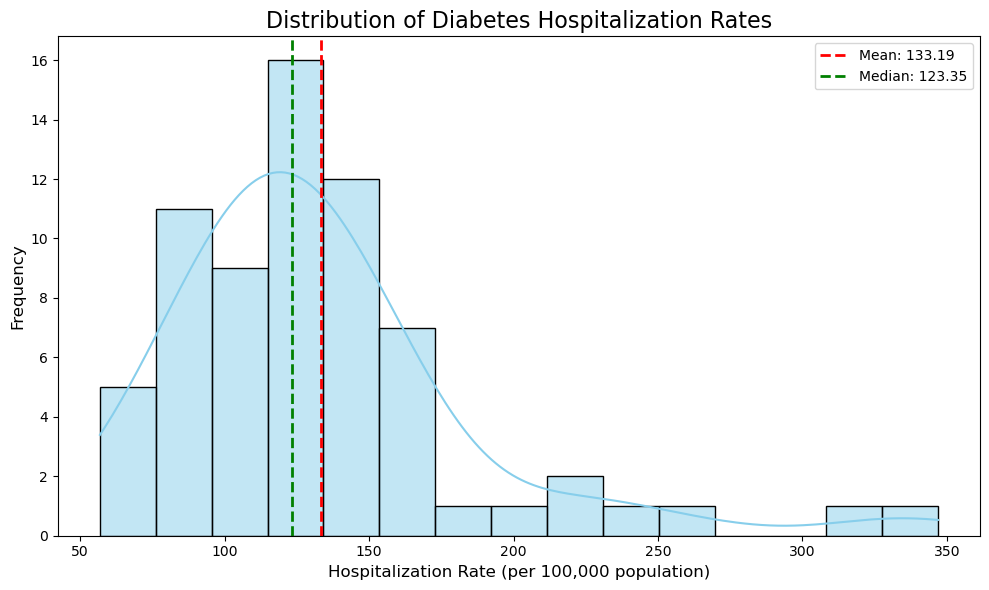

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Rate', kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Diabetes Hospitalization Rates', fontsize=16)
plt.xlabel('Hospitalization Rate (per 100,000 population)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines for mean and median
plt.axvline(df_combined['Rate'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df_combined["Rate"].mean():.2f}')
plt.axvline(df_combined['Rate'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df_combined["Rate"].median():.2f}')

plt.legend()
plt.tight_layout()
plt.show()

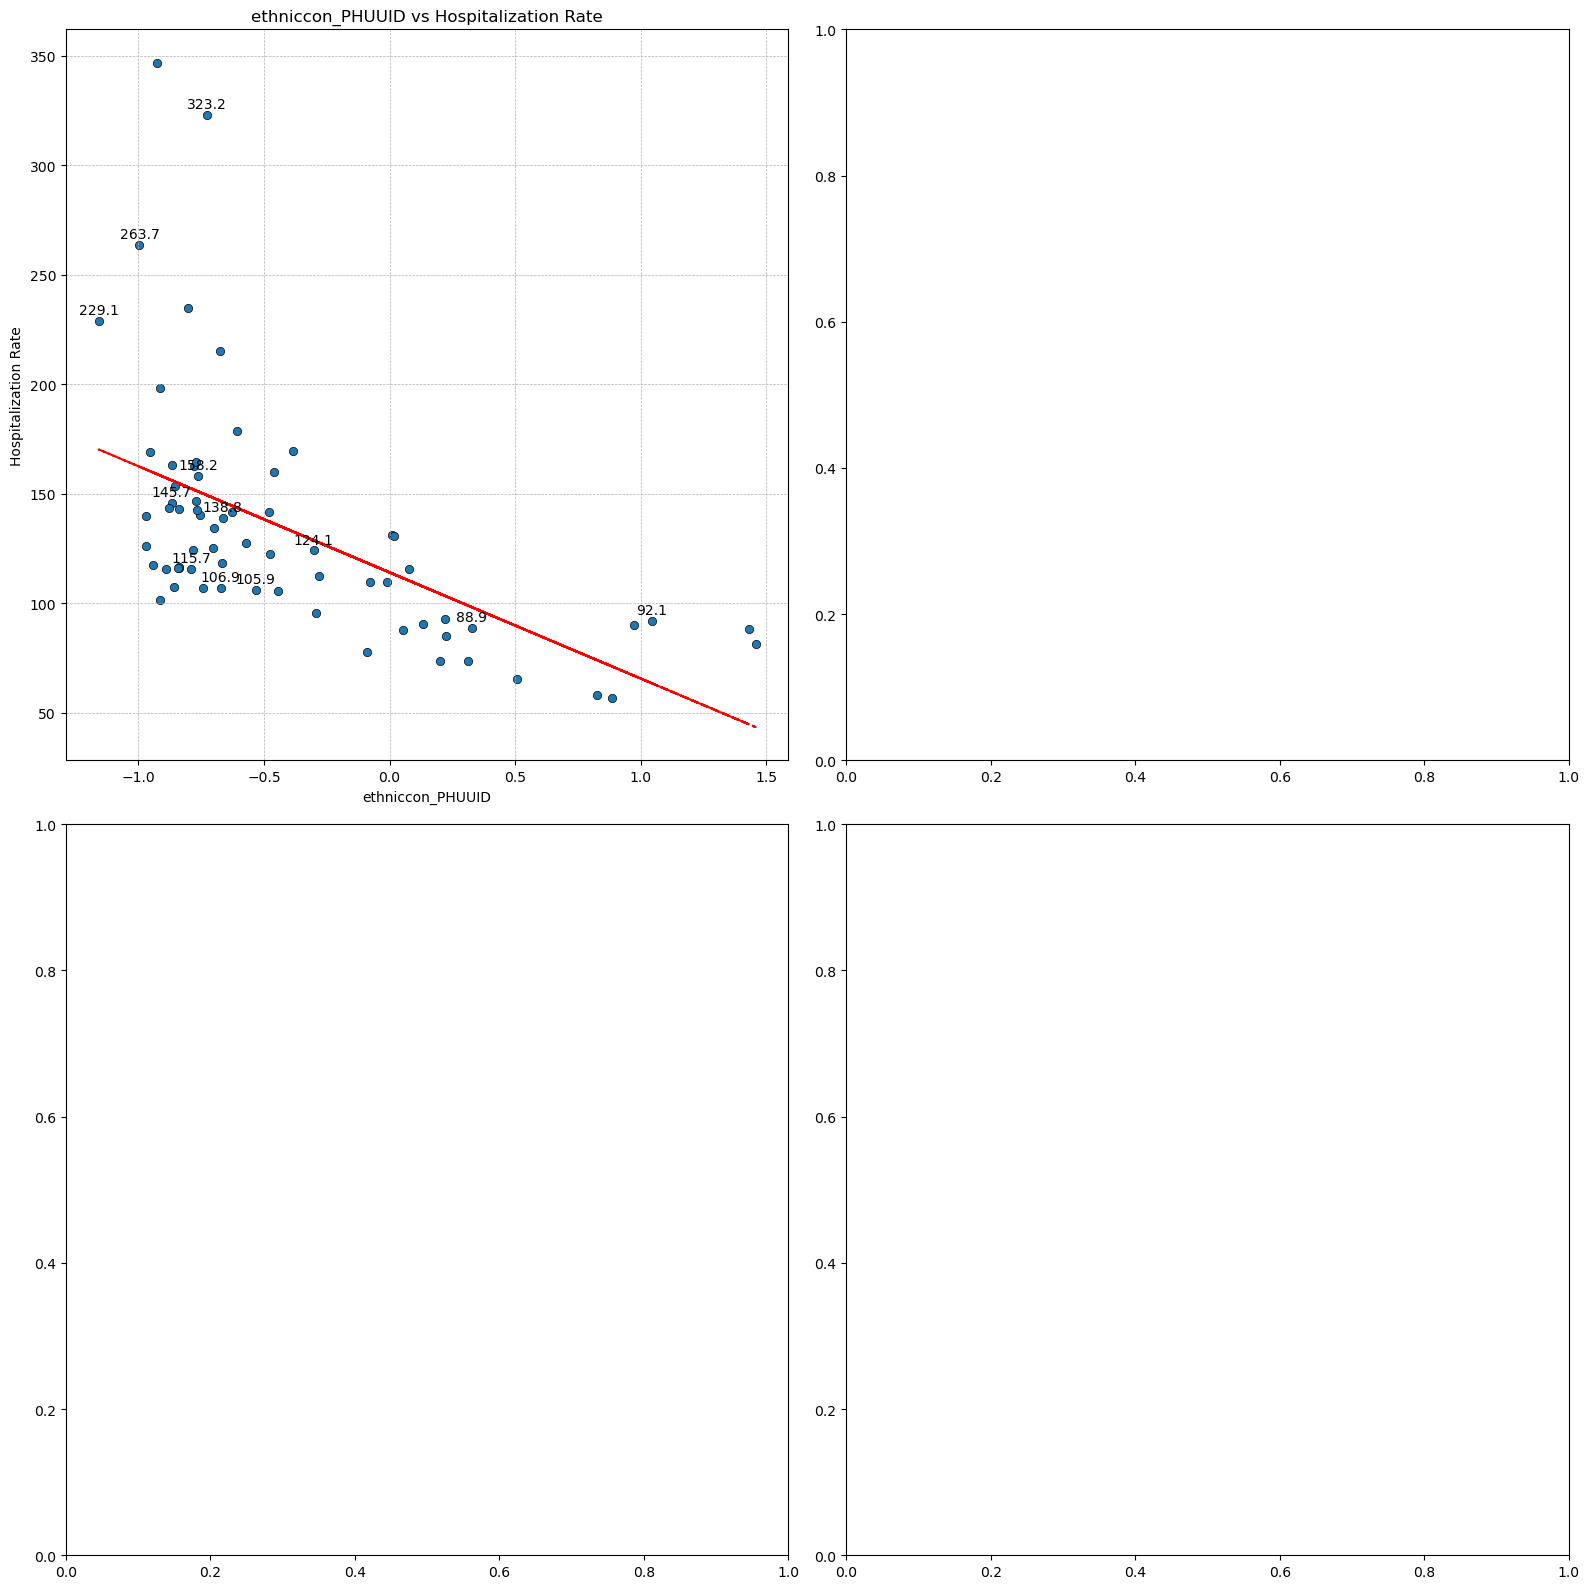

In [53]:
#Scatter plots for each ON-Marg factor vs. Rate
# fig, axes = plt.subplots(2, 2, figsize=(16, 16))
# axes = axes.ravel()

# for i, factor in enumerate(['ethniccon_PHUUID']):
#     sns.scatterplot(x=factor, y='Rate', data=df_combined, ax=axes[i])
#     axes[i].set_title(f'{factor} vs Hospitalization Rate')

# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Assume df_combined is already defined and contains the relevant data

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

for i, factor in enumerate(['ethniccon_PHUUID']):
    # Create scatter plot
    sns.scatterplot(x=factor, y='Rate', data=df_combined, ax=axes[i], edgecolor='k')
    
    # Prepare data for linear regression
    X = df_combined[[factor]].values
    y = df_combined['Rate'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    predicted = model.predict(X)
    
    # Plot trend line
    axes[i].plot(df_combined[factor], predicted, color='red', linestyle='--', label='Trend Line')
    
    # Add gridlines
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Optionally add annotations (if needed, customize as per your dataset)
    for j in range(0, len(df_combined), max(1, len(df_combined) // 10)):  # annotate every 10th point or adjust as needed
        axes[i].annotate(f'{df_combined["Rate"].iloc[j]:.1f}', 
                         (df_combined[factor].iloc[j], df_combined['Rate'].iloc[j]),
                         textcoords="offset points", xytext=(0,5), ha='center')
    
    axes[i].set_title(f'{factor} vs Hospitalization Rate')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Hospitalization Rate')

plt.tight_layout()
plt.show()


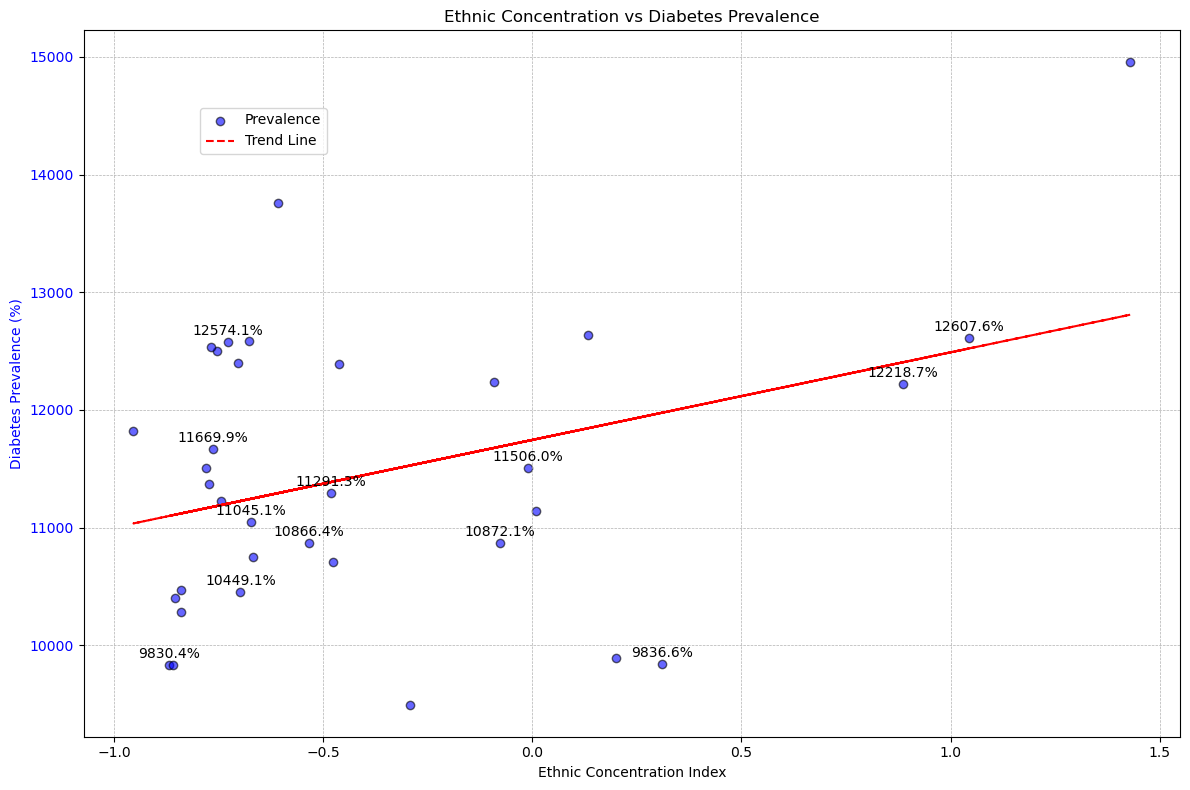

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Merge the datasets
merged_data = pd.merge(df_prev_2016[['Geography', 'Rate']], 
                       df_hos_2016[['Geography', 'Rate']], 
                       on='Geography', 
                       suffixes=('_prev', '_hosp'))
merged_data = pd.merge(merged_data, 
                       df_marg_2016[['Geography', 'ethniccon_PHUUID']], 
                       on='Geography')

# Rename columns for clarity
merged_data = merged_data.rename(columns={
    'Rate_prev': 'prevalence',
    'Rate_hosp': 'hospitalizationRate',
    'ethniccon_PHUUID': 'ethnicConcentration'
})

# Prepare data for linear regression
X = merged_data[['ethnicConcentration']].values
y = merged_data['prevalence'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)

# Create the scatter plot for prevalence
fig, ax = plt.subplots(figsize=(12, 8))

# Plot prevalence
scatter = ax.scatter(merged_data['ethnicConcentration'], merged_data['prevalence'], 
                     color='blue', alpha=0.6, label='Prevalence', edgecolor='k')

# Plot trend line
ax.plot(merged_data['ethnicConcentration'], predicted, color='red', linestyle='--', label='Trend Line')

# Add gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add annotations for clarity (example: adding text to a few points)
for i in range(0, len(merged_data), max(1, len(merged_data) // 10)):  # annotate every 10th point or adjust as needed
    ax.annotate(f'{merged_data["prevalence"].iloc[i]:.1f}%', 
                (merged_data['ethnicConcentration'].iloc[i], merged_data['prevalence'].iloc[i]),
                textcoords="offset points", xytext=(0,5), ha='center')

ax.set_xlabel('Ethnic Concentration Index')
ax.set_ylabel('Diabetes Prevalence (%)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add a title and legend
plt.title('Ethnic Concentration vs Diabetes Prevalence')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax.transAxes)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

